# Kevin's Final Analysis
Analyzing the association of PPE supplies fulfilled by county quartile

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Read both datafarmes
ppe_clean = pd.read_csv('../../CleanCSV/ppe_data_clean.csv', index_col = 'County')
county_clean = pd.read_csv('../../CleanCSV/County_Summary_DF.csv')

# Drop unnamed columns, and rename columns to be similar
ppe_clean.drop(['Unnamed: 0'], axis = 1, inplace = True)
ppe_clean = ppe_clean.rename(columns = {'Date': 'Month'})
county_clean.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [3]:
# Sort the dataframe correctly by month
ppe_clean['Month'] = pd.Categorical(ppe_clean['Month'], ['June','July','August','September','October'])
ppe_clean = ppe_clean.sort_values(['County','Month'])

In [4]:
ppe_clean.head()

,Product,Month,Amount Fulfilled
County,,,
Alameda,Cloth Masks,June,2872860.0
Alameda,Coveralls (Hospitals or EMS),June,102686.0
Alameda,Examination Gloves,June,15250760.0
Alameda,Face Shields (Disposable),June,2824316.0
Alameda,Goggles,June,299000.0


In [5]:
county_clean.head()

,County,Population 2020,Population Quartiles,Month,TotalCountConfirmed,Date,Total Cases(%)
0,Alameda,1684000,Quartile 4,March,269.0,2020-03-31,0.000160
1,Alameda,1684000,Quartile 4,April,1599.0,2020-04-30,0.000950
2,Alameda,1684000,Quartile 4,May,3362.0,2020-05-31,0.001996
3,Alameda,1684000,Quartile 4,June,6067.0,2020-06-30,0.003603
4,Alameda,1684000,Quartile 4,July,11441.0,2020-07-31,0.006794


In [6]:
# Merge both df by county and month
ppe_summary = pd.merge(ppe_clean, county_clean, on = ['County', 'Month'], how = 'outer')
ppe_summary

,County,Product,Month,Amount Fulfilled,Population 2020,Population Quartiles,TotalCountConfirmed,Date,Total Cases(%)
0,Alameda,Cloth Masks,June,2872860.0,1684000.0,Quartile 4,6067.0,2020-06-30,0.003603
1,Alameda,Coveralls (Hospitals or EMS),June,102686.0,1684000.0,Quartile 4,6067.0,2020-06-30,0.003603
2,Alameda,Examination Gloves,June,15250760.0,1684000.0,Quartile 4,6067.0,2020-06-30,0.003603
3,Alameda,Face Shields (Disposable),June,2824316.0,1684000.0,Quartile 4,6067.0,2020-06-30,0.003603
4,Alameda,Goggles,June,299000.0,1684000.0,Quartile 4,6067.0,2020-06-30,0.003603
...,...,...,...,...,...,...,...,...,...
5178,Yolo,NaN,April,NaN,224472.0,Quartile 3,164.0,2020-04-30,0.000731
5179,Yolo,NaN,May,NaN,224472.0,Quartile 3,211.0,2020-05-31,0.000940
5180,Yuba,NaN,March,NaN,80573.0,Quartile 2,5.0,2020-03-31,0.000062
5181,Yuba,NaN,April,NaN,80573.0,Quartile 2,15.0,2020-04-30,0.000186


In [7]:
# Drop rows with null values
ppe_summary = ppe_summary.dropna()
ppe_summary.head()

,County,Product,Month,Amount Fulfilled,Population 2020,Population Quartiles,TotalCountConfirmed,Date,Total Cases(%)
0,Alameda,Cloth Masks,June,2872860.0,1684000.0,Quartile 4,6067.0,2020-06-30,0.003603
1,Alameda,Coveralls (Hospitals or EMS),June,102686.0,1684000.0,Quartile 4,6067.0,2020-06-30,0.003603
2,Alameda,Examination Gloves,June,15250760.0,1684000.0,Quartile 4,6067.0,2020-06-30,0.003603
3,Alameda,Face Shields (Disposable),June,2824316.0,1684000.0,Quartile 4,6067.0,2020-06-30,0.003603
4,Alameda,Goggles,June,299000.0,1684000.0,Quartile 4,6067.0,2020-06-30,0.003603


# Analyzing the data


In [8]:
ppe_summary.head()

,County,Product,Month,Amount Fulfilled,Population 2020,Population Quartiles,TotalCountConfirmed,Date,Total Cases(%)
0,Alameda,Cloth Masks,June,2872860.0,1684000.0,Quartile 4,6067.0,2020-06-30,0.003603
1,Alameda,Coveralls (Hospitals or EMS),June,102686.0,1684000.0,Quartile 4,6067.0,2020-06-30,0.003603
2,Alameda,Examination Gloves,June,15250760.0,1684000.0,Quartile 4,6067.0,2020-06-30,0.003603
3,Alameda,Face Shields (Disposable),June,2824316.0,1684000.0,Quartile 4,6067.0,2020-06-30,0.003603
4,Alameda,Goggles,June,299000.0,1684000.0,Quartile 4,6067.0,2020-06-30,0.003603


In [9]:
# Separate dataframe by product for analysis and graphing later

n95 = ppe_summary.loc[ppe_summary['Product'] == 'N-95 Respirators']
surgMasks = ppe_summary.loc[ppe_summary['Product'] == 'Surgical Masks']
examGloves = ppe_summary.loc[ppe_summary['Product'] == 'Examination Gloves']
handSani = ppe_summary.loc[ppe_summary['Product'] == 'Hand Sanitizers']
clothMasks = ppe_summary.loc[ppe_summary['Product'] == 'Cloth Masks']
testKits = ppe_summary.loc[ppe_summary['Product'] == 'Viral Testing Media']


In [10]:
# Group each product dataframe by quartiles, and take the mean of each quartile

n95_quartile = n95.groupby(['Population Quartiles', 'Month'], as_index = False).agg({'Amount Fulfilled': ['mean']})
n95_quartile.columns = n95_quartile.columns.droplevel(1)
n95_quartile['Month'] = pd.Categorical(n95_quartile['Month'], ['June','July','August','September','October'])
n95_quartile = n95_quartile.sort_values(['Population Quartiles','Month'])
n95_quartile.set_index('Month', inplace = True)

surgMasks_quartile = surgMasks.groupby(['Population Quartiles', 'Month'], as_index = False).agg({'Amount Fulfilled': ['mean']})
surgMasks_quartile.columns = surgMasks_quartile.columns.droplevel(1)
surgMasks_quartile['Month'] = pd.Categorical(surgMasks_quartile['Month'], ['June','July','August','September','October'])
surgMasks_quartile = surgMasks_quartile.sort_values(['Population Quartiles','Month'])
surgMasks_quartile.set_index('Month', inplace = True)

examGloves_quartile = examGloves.groupby(['Population Quartiles', 'Month'], as_index = False).agg({'Amount Fulfilled': ['mean']})
examGloves_quartile.columns = examGloves_quartile.columns.droplevel(1)
examGloves_quartile['Month'] = pd.Categorical(examGloves_quartile['Month'], ['June','July','August','September','October'])
examGloves_quartile = examGloves_quartile.sort_values(['Population Quartiles','Month'])
examGloves_quartile.set_index('Month', inplace = True)

handSani_quartile = handSani.groupby(['Population Quartiles', 'Month'], as_index = False).agg({'Amount Fulfilled': ['mean']})
handSani_quartile.columns = handSani_quartile.columns.droplevel(1)
handSani_quartile['Month'] = pd.Categorical(handSani_quartile['Month'], ['June','July','August','September','October'])
handSani_quartile = handSani_quartile.sort_values(['Population Quartiles','Month'])
handSani_quartile.set_index('Month', inplace = True)

clothMasks_quartile = clothMasks.groupby(['Population Quartiles', 'Month'], as_index = False).agg({'Amount Fulfilled': ['mean']})
clothMasks_quartile.columns = clothMasks_quartile.columns.droplevel(1)
clothMasks_quartile['Month'] = pd.Categorical(clothMasks_quartile['Month'], ['June','July','August','September','October'])
clothMasks_quartile = clothMasks_quartile.sort_values(['Population Quartiles','Month'])
clothMasks_quartile.set_index('Month', inplace = True)

testKits_quartile = testKits.groupby(['Population Quartiles', 'Month'], as_index = False).agg({'Amount Fulfilled': ['mean']})
testKits_quartile.columns = testKits_quartile.columns.droplevel(1)
testKits_quartile['Month'] = pd.Categorical(testKits_quartile['Month'], ['June','July','August','September','October'])
testKits_quartile = testKits_quartile.sort_values(['Population Quartiles','Month'])
testKits_quartile.set_index('Month', inplace = True)

# Print example of one of these dataframes
surgMasks_quartile

,Population Quartiles,Amount Fulfilled
Month,,
June,Quartile 1,2.999110e+06
July,Quartile 1,6.412092e+06
August,Quartile 1,7.825803e+06
September,Quartile 1,1.023604e+07
October,Quartile 1,5.482645e+06
June,Quartile 2,7.655950e+06
July,Quartile 2,1.810172e+07
August,Quartile 2,2.274998e+07
September,Quartile 2,2.663493e+07


C:\Users\Kevin\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\Kevin\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\Kevin\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\Kevin\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\Kevin\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together wi

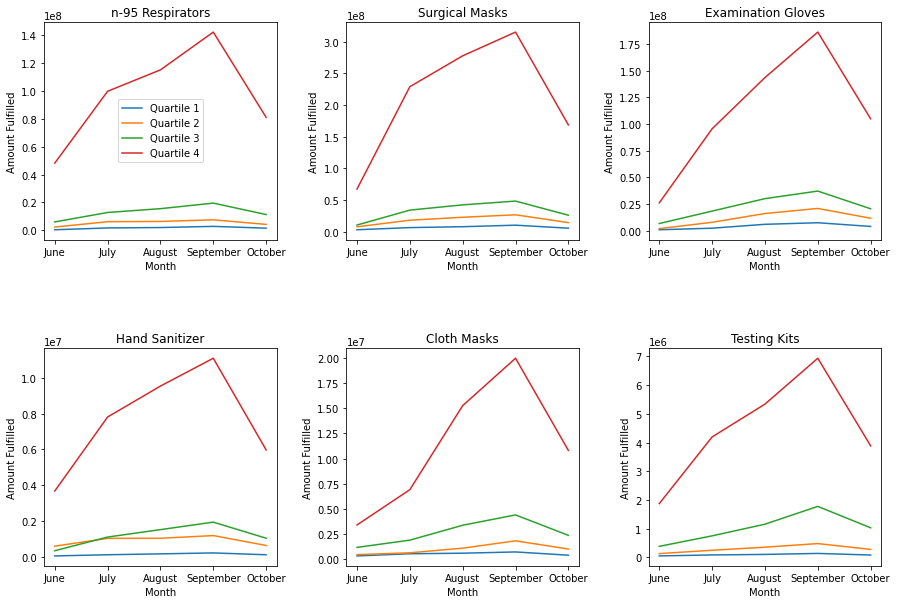

In [11]:
# Graph all the quartile dataframes together into one plot via subplot
fig, axes = plt.subplots(2, 3, figsize = (15,10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

n95_quartile.groupby('Population Quartiles')['Amount Fulfilled'].plot(ax = axes[0,0])
axes[0,0].set_title('n-95 Respirators')
axes[0,0].set_ylabel('Amount Fulfilled')
axes[0,0].set_xticklabels(['0', 'June','July','August','September','October','o'])
axes[0,0].legend(loc = 'best')

surgMasks_quartile.groupby('Population Quartiles')['Amount Fulfilled'].plot(ax = axes[0,1])
axes[0,1].set_title('Surgical Masks')
axes[0,1].set_ylabel('Amount Fulfilled')
axes[0,1].set_xticklabels(['0', 'June','July','August','September','October','o'])

examGloves_quartile.groupby('Population Quartiles')['Amount Fulfilled'].plot(ax = axes[0,2])
axes[0,2].set_title('Examination Gloves')
axes[0,2].set_ylabel('Amount Fulfilled')
axes[0,2].set_xticklabels(['0', 'June','July','August','September','October','o'])

handSani_quartile.groupby('Population Quartiles')['Amount Fulfilled'].plot(ax = axes[1,0])
axes[1,0].set_title('Hand Sanitizer')
axes[1,0].set_ylabel('Amount Fulfilled')
axes[1,0].set_xticklabels(['0', 'June','July','August','September','October','o'])

clothMasks_quartile.groupby('Population Quartiles')['Amount Fulfilled'].plot(ax = axes[1,1])
axes[1,1].set_title('Cloth Masks')
axes[1,1].set_ylabel('Amount Fulfilled')
axes[1,1].set_xticklabels(['0', 'June','July','August','September','October','o'])

testKits_quartile.groupby('Population Quartiles')['Amount Fulfilled'].plot(ax = axes[1,2])
axes[1,2].set_title('Testing Kits')
axes[1,2].set_ylabel('Amount Fulfilled')
axes[1,2].set_xticklabels(['0', 'June','July','August','September','October','o'])

# Save the resultant graph
plt.savefig('../../PNG/PPE_Supply.png')